# **PowerCo - Churn Analysis and Prediction**

**Powerco is a major gas and electricity utility that supplies corporate, SME (Small & Medium enterprises), and residential customers.The power liberalization of the energy market in Europe has led to significant customer churn, especially in the SME segment.They have partnered with BCG to help diagnose the source of churning SME customers.**

**A fair hypothesis is that price changes affect customer churn.Therefore, it is helpful to know which customers are more (or less) likely to churn at their current price, for which a good predictive model could be useful.**

### **Hypothesis Framing**

***Null Hypothesis : The change in customer price affects customer churn.***

***Alternative Hypothesis : The change in customer price does not affect customer churn.***

### **Electricity Pricing**

***Fixed Charges: These charges are electricity costs that don’t change no matter how much electricity you use. Fixed charges are designed to recover the basic cost of electric service. The fixed demand charges can be charged as per the use of utility service in the area and can result in higher charges due to the higher use of the utility.***

***Peak Pricing or Tariff Pricing: Such a type of tariff is similar to peak load tariffs. The only difference is that the seasonal tariff measures the peak hour of the year and the peak tariff calculates it for the day. If the power consumption is high, then it is known as the on-peak tariff, and for low power consumption, it is called the off-peak load tariff.***

**Difference between power and energy**

***Energy: Energy is the capacity to do work. Energy is power integrated over time(Unit = joules).***

***Power: Power is the rate at which work is done, or energy is transmitted.(Unit = watt)***

### **Importing Necessary Packages**

In [ ]:
import numpy as np #Numerical Analysis
import pandas as pd #ETL
import matplotlib.pyplot as plt #Data Visualization
import seaborn as sns #Data Visualization
import warnings #Supressing Unnecessary Warnings

In [ ]:
#Options and Settings
warnings.simplefilter('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
colors = sns.color_palette("Set3", 10)

In [ ]:
#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score,classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler,QuantileTransformer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

## **Importing Dataset**

In [ ]:
price_data = pd.read_csv('price_data.csv')
client_data = pd.read_csv('client_data.csv')

In [ ]:
price_data.head()


,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [ ]:
client_data.head()


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


# **Exploring Price_data**

In [ ]:
price_data.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [ ]:
price_data.shape

(193002, 8)

In [ ]:
client_data.shape

(14606, 26)

In [ ]:
price_data.tail()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193001,16f51cdc2baa19af0b940ee1b3dd17d5,2015-12-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


In [ ]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [ ]:
#price_data.isnull()

In [ ]:
#Checking for duplicates
price_data[price_data.duplicated()]

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix


In [ ]:
#Changing datatype : price date => object -> datetime64
price_data = price_data.astype({'price_date' : 'datetime64'})

In [ ]:
print('No of unique clients : ',price_data.id.nunique())
#basic Stats
price_data.describe()

No of unique clients :  16096


,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


## **Merging Client Dataset and Price Dataset**

**Merging price and client dataset using id**

In [ ]:
client_churn_info = client_data[['id','churn']]
price_df = client_churn_info.merge(price_data,on='id')

In [ ]:
#Merged Dataset
price_df.head()

,id,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
3,24011ae4ebbe3035111d65fa7c15bc57,1,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
4,24011ae4ebbe3035111d65fa7c15bc57,1,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383


## **Univariant Analysis**
**Plotting histogram to see the distribution of the data.**

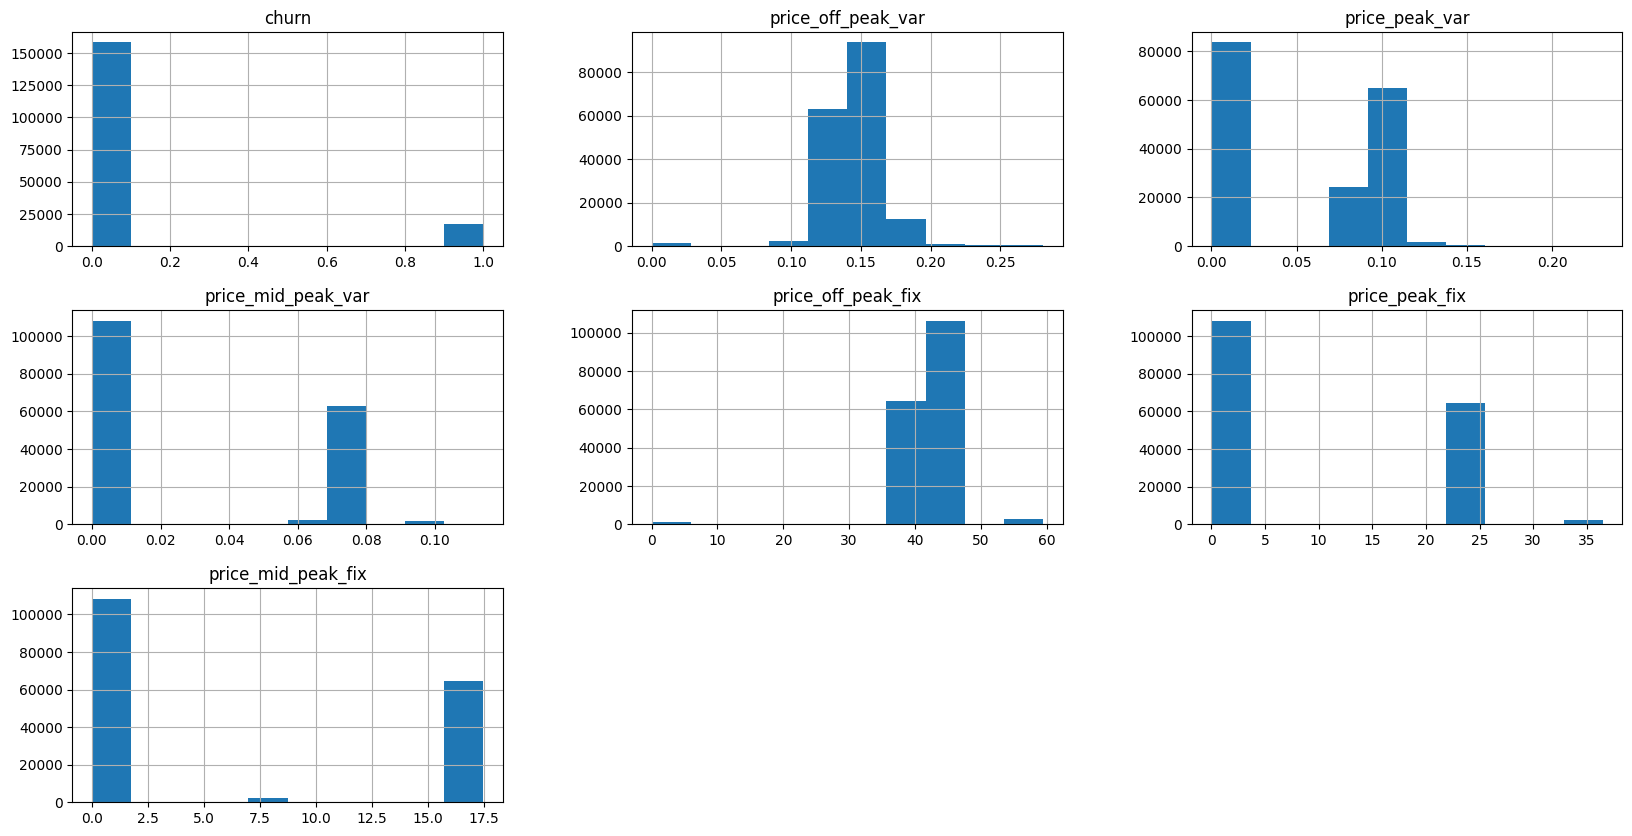

In [ ]:
price_df.groupby(['id','price_date']).mean().hist(figsize=(20,10))
plt.show()

***The HistPlot shows that the data is skewed and show be treated before model creation.***

## **Plotting Energy and Power Prices**

In [ ]:
#Spliting the dataset into chrun and non-churn price by price date
churn_grp_price = price_df[price_df['churn']==1].groupby(['price_date']).mean()
non_churn_grp_price = price_df[price_df['churn']==0].groupby('price_date').mean()

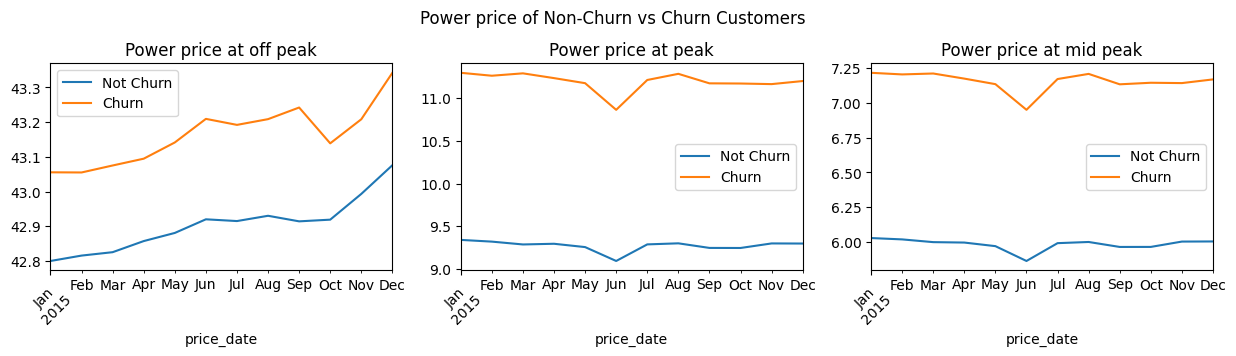

In [ ]:
#Plotting average price of power by month
plt.figure(figsize=(15,3))
plt.xticks(rotation=45)
plt.subplot(131)
non_churn_grp_price.price_off_peak_fix.plot()
churn_grp_price.price_off_peak_fix.plot()
plt.xticks(rotation=45)
plt.legend(['Not Churn','Churn'])
plt.title('Power price at off peak')
plt.subplot(132)
non_churn_grp_price.price_peak_fix.plot()
churn_grp_price.price_peak_fix.plot()
plt.legend(['Not Churn','Churn'])
plt.title('Power price at peak')
plt.xticks(rotation=45)
plt.subplot(133)
non_churn_grp_price.price_mid_peak_fix.plot()
churn_grp_price.price_mid_peak_fix.plot()
plt.legend(['Not Churn','Churn'])
plt.title('Power price at mid peak')
plt.xticks(rotation=45)
plt.suptitle('Power price of Non-Churn vs Churn Customers')
plt.subplots_adjust(top=0.8)
plt.show()

***There is some variation of price between churn and un-churn clients. Churned clients have slightly low off-peak energy prices and high off-peak prices. But we can't confidently say this is the factor for churn.We need to analyze the data further to arrive at a concrete conclusion.***

## **Correlational Heatmap**
**Before merging the dataset with the client dataset, we should conduct a correlation analysis to identify the features replicating the same information.**

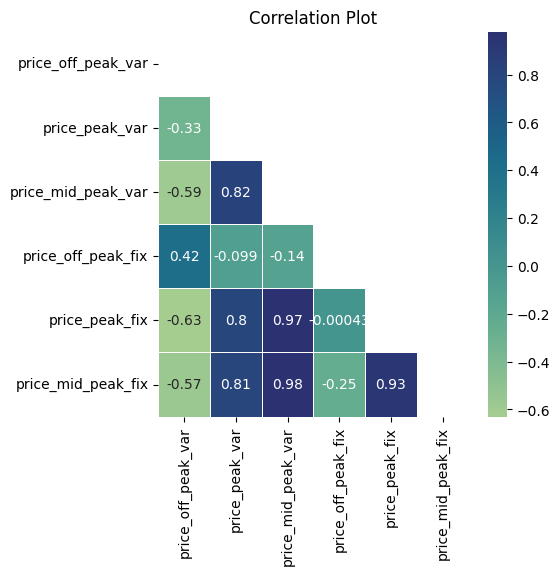

In [ ]:
plt.figure(figsize=(5,5))
pd_corr = price_data.corr()
mask = np.triu(np.ones_like(pd_corr))
sns.heatmap(pd_corr,annot=True,cmap="crest",linewidth=.5,mask=mask)
plt.title('Correlation Plot')
plt.show()

In [ ]:
price_data.drop(['price_peak_var','price_peak_fix','price_mid_peak_var'],axis=1,inplace=True)

***High co-relation coefficient values between two features denote the high dependency between them. It shows that the two features convey the same information. So one of the features can be dropped.***

## **Feature Engineering**
**Since the price information is monthly, we can't able to merge it directly with the client data.Some feature transformations need to be done to derive the yearly prices.The off-peak and mid-peak of energy follow a linear flow, so we can take the average of the monthly prices.The energy off-peak price was high at the beginning of the year and low at the end of the year.So we take the price difference as a consolidated value.**

In [ ]:
#Filtering out the January and December energy off peak price
price_off_peak_energy = price_data[['id','price_off_peak_var']]
jan_prices = price_off_peak_energy.groupby('id').price_off_peak_var.first().reset_index().rename(columns={'price_off_peak_var':'price_off_peak_var_jan'})
dec_prices = price_off_peak_energy.groupby('id').last().price_off_peak_var.reset_index().rename(columns={'price_off_peak_var':'price_off_peak_var_dec'})

In [ ]:
price_data.drop('price_off_peak_var',axis=1,inplace=True)
#Taking average of Power off-peak and mid-peak
price_data = price_data.groupby('id').mean().reset_index()

In [ ]:
#Calculating Energy off peak difference
price_data = price_data.merge(jan_prices,on='id').merge(dec_prices,on='id')
price_data['energy_off_peak_variation'] = price_data.price_off_peak_var_jan - price_data.price_off_peak_var_dec
price_data.drop(['price_off_peak_var_jan','price_off_peak_var_dec'],axis=1,inplace=True)

In [ ]:
#Final price dataset
price_data.head()

,id,price_off_peak_fix,price_mid_peak_fix,energy_off_peak_variation
0,0002203ffbb812588b632b9e628cc38d,40.701732,16.280694,0.006192
1,0004351ebdd665e6ee664792efc4fd13,44.385450,0.000000,0.004104
2,0010bcc39e42b3c2131ed2ce55246e3c,45.319710,0.000000,-0.050443
3,0010ee3855fdea87602a5b7aba8e42de,40.647427,16.258971,0.010018
4,00114d74e963e47177db89bc70108537,44.266930,0.000000,0.003994


## **Exploring Client Data**


In [ ]:
#Inspecting Client Data
client_data.head()


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


***The activity_new (category of the company's activity) data is not provided.***



In [ ]:
client_data.shape

(14606, 26)

In [ ]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [ ]:
#Checking for duplicates
client_data[client_data.duplicated()]

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn


In [ ]:
client_data.duplicated().value_counts()


False    14606
dtype: int64

In [ ]:
#Changing datatype
client_data = client_data.astype({
    'date_activ' : 'datetime64',
    'date_end' : 'datetime64',
    'date_modif_prod' : 'datetime64',
    'date_renewal' : 'datetime64',
})

## **Data Cleaning and Feature Engineering**


In [ ]:
#Changing hashed values to meaningful labels for easy understanding.
print('Unique Sales Channels : \n',client_data.channel_sales.unique())
print('\nUnique Origin Campaign : \n',client_data.origin_up.unique())

Unique Sales Channels : 
 ['foosdfpfkusacimwkcsosbicdxkicaua' 'MISSING'
 'lmkebamcaaclubfxadlmueccxoimlema' 'usilxuppasemubllopkaafesmlibmsdf'
 'ewpakwlliwisiwduibdlfmalxowmwpci' 'epumfxlbckeskwekxbiuasklxalciiuu'
 'sddiedcslfslkckwlfkdpoeeailfpeds' 'fixdbufsefwooaasfcxdxadsiekoceaa']

Unique Origin Campaign : 
 ['lxidpiddsbxsbosboudacockeimpuepw' 'kamkkxfxxuwbdslkwifmmcsiusiuosws'
 'ldkssxwpmemidmecebumciepifcamkci' 'MISSING'
 'usapbepcfoloekilkwsdiboslwaxobdp' 'ewxeelcelemmiwuafmddpobolfuxioce']


In [ ]:
channel_mask = {
    'MISSING':'missing_data',
    'foosdfpfkusacimwkcsosbicdxkicaua':'channel_1',
    'lmkebamcaaclubfxadlmueccxoimlema':'channel_2',
    'usilxuppasemubllopkaafesmlibmsdf':'channel_3',
    'ewpakwlliwisiwduibdlfmalxowmwpci':'channel_4',
    'epumfxlbckeskwekxbiuasklxalciiuu':'channel_5',
    'sddiedcslfslkckwlfkdpoeeailfpeds':'channel_6',
    'fixdbufsefwooaasfcxdxadsiekoceaa':'channel_7',
}
origin_mask = {
    'lxidpiddsbxsbosboudacockeimpuepw' : 'origin_1',
    'kamkkxfxxuwbdslkwifmmcsiusiuosws' : 'origin_2',
    'ldkssxwpmemidmecebumciepifcamkci' : 'origin_3',
    'usapbepcfoloekilkwsdiboslwaxobdp' : 'origin_4',
    'ewxeelcelemmiwuafmddpobolfuxioce' : 'origin_5',
    'MISSING' : 'origin_missing'
}
client_data.replace({
    'has_gas' : {
        't':1,'f':0
    },
    'channel_sales':channel_mask,
    'origin_up':origin_mask,
},inplace=True)
#Labeled Data
client_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,channel_1,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.00,25.44,25.44,2,678.99,3,origin_1,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,missing_data,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0,0.00,16.38,16.38,1,18.89,6,origin_2,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,channel_1,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0,0.00,28.60,28.60,1,6.60,6,origin_2,13.856,0
3,bba03439a292a1e166f80264c16191cb,channel_2,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0,0.00,30.22,30.22,1,25.46,6,origin_2,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,missing_data,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,0,52.32,44.91,44.91,1,47.98,6,origin_2,19.800,0


In [ ]:
#contract_modification_interval : no of years in which the client last modified their contract.
#contract_interval : no of years client travelled with us.
client_data['contract_modification_interval'] = client_data.date_modif_prod.dt.year - client_data.date_activ.dt.year
client_data['contract_interval'] = client_data.date_end.dt.year - client_data.date_activ.dt.year

### **Merging Client and Price Data**


In [ ]:
df = client_data.merge(price_data,on='id')
print('Total No of Clients in Price Dataset : ',price_data.id.nunique(),'\nTotal No of Clients in Client Dataset : ',client_data.id.nunique(),'\nTotal No of Clients after merging : ',df.id.nunique())

Total No of Clients in Price Dataset :  16096 
Total No of Clients in Client Dataset :  14606 
Total No of Clients after merging :  14606


***There is no client data for 1490 clients.***



In [ ]:
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,contract_modification_interval,contract_interval,price_off_peak_fix,price_mid_peak_fix,energy_off_peak_variation
0,24011ae4ebbe3035111d65fa7c15bc57,channel_1,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.00,25.44,25.44,2,678.99,3,origin_1,43.648,1,2,3,40.942265,14.901340,-0.020057
1,d29c2c54acc38ff3c0614d0a653813dd,missing_data,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0,0.00,16.38,16.38,1,18.89,6,origin_2,13.800,0,0,7,44.311375,0.000000,0.003767
2,764c75f661154dac3a6c254cd082ea7d,channel_1,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0,0.00,28.60,28.60,1,6.60,6,origin_2,13.856,0,0,6,44.385450,0.000000,0.004670
3,bba03439a292a1e166f80264c16191cb,channel_2,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0,0.00,30.22,30.22,1,25.46,6,origin_2,13.200,0,0,6,44.400265,0.000000,0.004547
4,149d57cf92fc41cf94415803a877cb4b,missing_data,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,0,52.32,44.91,44.91,1,47.98,6,origin_2,19.800,0,0,6,40.688156,16.275263,0.006192


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14606 entries, 0 to 14605
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

## **Correlation Analysis**
**We have around 31 features.Some of features are derived quantities, by conducting correlation analysis we can able to reduce the highly correlated features.**

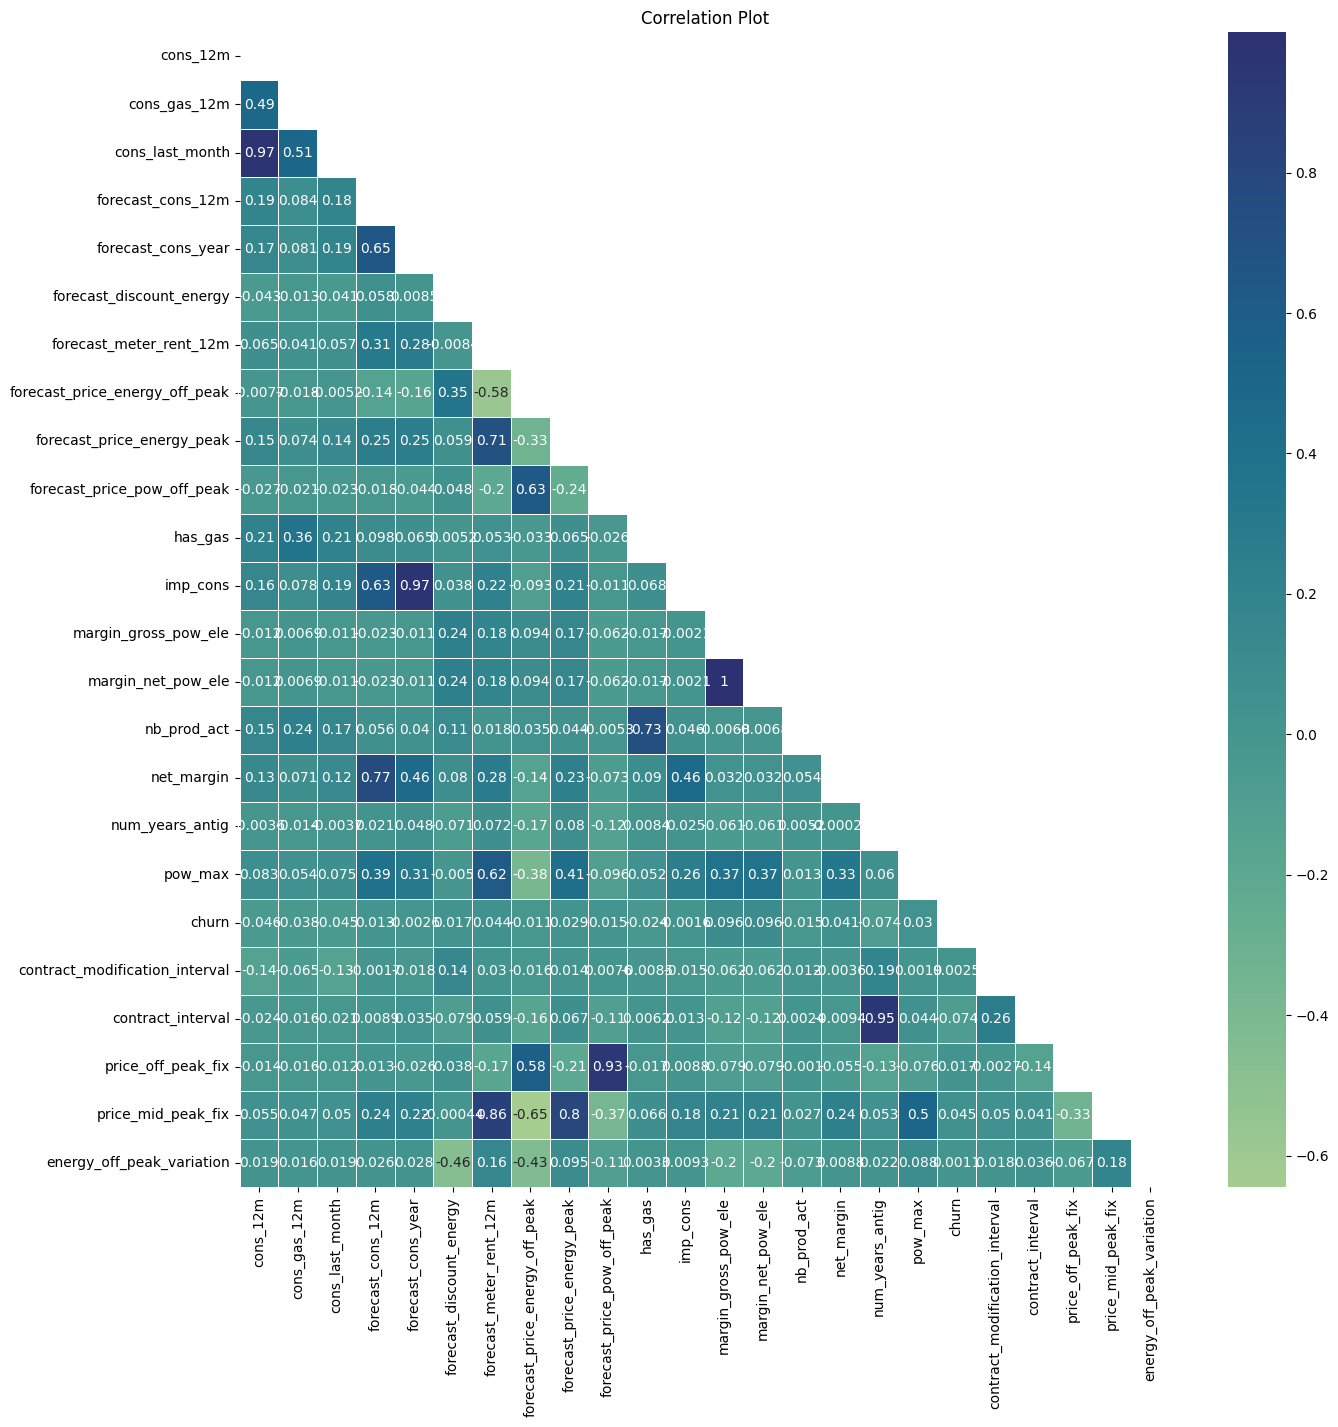

In [ ]:
plt.figure(figsize=(15,15))
df_corr = df.corr()
mask = np.triu(np.ones_like(df_corr))
sns.heatmap(df_corr,annot=True,cmap="crest",linewidth=.5,mask=mask)
plt.title('Correlation Plot')
plt.show()

In [ ]:
df_corr 

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,contract_modification_interval,contract_interval,price_off_peak_fix,price_mid_peak_fix,energy_off_peak_variation
cons_12m,1.000000,0.488474,0.968212,0.193947,0.167093,-0.043282,0.065268,-0.007748,0.145908,-0.026566,0.212973,0.159711,-0.011926,-0.011905,0.154251,0.133614,-0.003565,0.082889,-0.045968,-0.139986,-0.023681,-0.013744,0.055081,0.018833
cons_gas_12m,0.488474,1.000000,0.507007,0.084359,0.080934,-0.012595,0.041393,-0.017684,0.074002,-0.020558,0.359679,0.077846,0.006868,0.006852,0.239387,0.070867,-0.013815,0.054317,-0.037957,-0.065459,-0.015710,-0.015544,0.046995,0.016348
cons_last_month,0.968212,0.507007,1.000000,0.177773,0.193574,-0.040874,0.057476,-0.005187,0.136802,-0.023017,0.210662,0.187034,-0.011498,-0.011477,0.169099,0.121835,-0.003677,0.074529,-0.045284,-0.134940,-0.021250,-0.012171,0.050166,0.019145
forecast_cons_12m,0.193947,0.084359,0.177773,1.000000,0.647727,0.058435,0.305627,-0.135646,0.254056,-0.018477,0.097867,0.634600,-0.023220,-0.023231,0.055915,0.768537,0.021283,0.393946,0.012949,-0.001674,0.008906,0.012959,0.235679,0.025566
forecast_cons_year,0.167093,0.080934,0.193574,0.647727,1.000000,0.008518,0.276009,-0.158012,0.251005,-0.044190,0.064976,0.969395,-0.010759,-0.010727,0.040426,0.464928,0.048248,0.309647,-0.002558,-0.017972,0.035444,-0.025582,0.224427,0.028205
forecast_discount_energy,-0.043282,-0.012595,-0.040874,0.058435,0.008518,1.000000,-0.008388,0.353735,0.059318,0.048024,0.005223,0.037939,0.241142,0.240421,0.106812,0.079784,-0.070697,-0.005032,0.017026,0.140224,-0.079020,0.037664,-0.000440,-0.459795
forecast_meter_rent_12m,0.065268,0.041393,0.057476,0.305627,0.276009,-0.008388,1.000000,-0.579353,0.706376,-0.203089,0.052873,0.224212,0.183509,0.183566,0.018109,0.275830,0.071558,0.618549,0.044245,0.029520,0.058796,-0.168442,0.855965,0.164014
forecast_price_energy_off_peak,-0.007748,-0.017684,-0.005187,-0.135646,-0.158012,0.353735,-0.579353,1.000000,-0.330138,0.630377,-0.032754,-0.092535,0.094498,0.094216,0.035093,-0.135107,-0.168095,-0.384397,-0.010837,-0.015733,-0.162979,0.575805,-0.645149,-0.428251
forecast_price_energy_peak,0.145908,0.074002,0.136802,0.254056,0.251005,0.059318,0.706376,-0.330138,1.000000,-0.242017,0.064715,0.212317,0.165483,0.165560,0.044141,0.234942,0.080260,0.411532,0.029315,0.014402,0.067365,-0.207921,0.796767,0.095414
forecast_price_pow_off_peak,-0.026566,-0.020558,-0.023017,-0.018477,-0.044190,0.048024,-0.203089,0.630377,-0.242017,1.000000,-0.026138,-0.011318,-0.061869,-0.061925,-0.005335,-0.072623,-0.120136,-0.095897,0.014778,0.007605,-0.109680,0.934633,-0.371031,-0.105114


### **Dropping Highly Correlated and Unwanted Columns**

In [ ]:
df.drop([
    #Highly correlated columns
    'cons_last_month','forecast_cons_12m', 'forecast_cons_year','forecast_meter_rent_12m',
    'forecast_meter_rent_12m', 'forecast_price_energy_off_peak','forecast_price_energy_peak', 
    'forecast_price_pow_off_peak','margin_gross_pow_ele', 'nb_prod_act',
    'num_years_antig',
    #Unwanted Columns
    'id','date_activ','date_end','date_renewal','date_modif_prod',
],axis=1,inplace=True)

In [ ]:
df.head()

,channel_sales,cons_12m,cons_gas_12m,forecast_discount_energy,has_gas,imp_cons,margin_net_pow_ele,net_margin,origin_up,pow_max,churn,contract_modification_interval,contract_interval,price_off_peak_fix,price_mid_peak_fix,energy_off_peak_variation
0,channel_1,0,54946,0.0,1,0.00,25.44,678.99,origin_1,43.648,1,2,3,40.942265,14.901340,-0.020057
1,missing_data,4660,0,0.0,0,0.00,16.38,18.89,origin_2,13.800,0,0,7,44.311375,0.000000,0.003767
2,channel_1,544,0,0.0,0,0.00,28.60,6.60,origin_2,13.856,0,0,6,44.385450,0.000000,0.004670
3,channel_2,1584,0,0.0,0,0.00,30.22,25.46,origin_2,13.200,0,0,6,44.400265,0.000000,0.004547
4,missing_data,4425,0,0.0,0,52.32,44.91,47.98,origin_2,19.800,0,0,6,40.688156,16.275263,0.006192


In [ ]:
df.describe()

,cons_12m,cons_gas_12m,forecast_discount_energy,has_gas,imp_cons,margin_net_pow_ele,net_margin,pow_max,churn,contract_modification_interval,contract_interval,price_off_peak_fix,price_mid_peak_fix,energy_off_peak_variation
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,0.966726,0.181501,152.786896,24.562517,189.264522,18.135136,0.097152,1.890251,5.487060,42.928890,6.097680,0.004566
std,5.734653e+05,1.629731e+05,5.108289,0.385446,341.369366,20.230280,311.798130,13.534743,0.296175,2.298371,1.659825,4.550759,7.770748,0.012049
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,3.300000,0.000000,0.000000,2.000000,0.000000,0.000000,-0.168958
25%,5.674750e+03,0.000000e+00,0.000000,0.000000,0.000000,14.280000,50.712500,12.500000,0.000000,0.000000,4.000000,40.688156,0.000000,0.003520
50%,1.411550e+04,0.000000e+00,0.000000,0.000000,37.395000,21.640000,112.530000,13.856000,0.000000,0.000000,5.000000,44.281745,0.000000,0.005344
75%,4.076375e+04,0.000000e+00,0.000000,0.000000,193.980000,29.880000,243.097500,19.172500,0.000000,4.000000,6.000000,44.370635,16.248109,0.007829
max,6.207104e+06,4.154590e+06,30.000000,1.000000,15042.790000,374.640000,24570.650000,320.000000,1.000000,12.000000,13.000000,59.286190,16.818917,0.148477


In [ ]:
#Duplicate Records
df[df.duplicated(subset=['cons_12m',
       'imp_cons', 'net_margin',
       'pow_max', 'churn', 'price_off_peak_fix', 'price_mid_peak_fix',
       'energy_off_peak_variation'])]

,channel_sales,cons_12m,cons_gas_12m,forecast_discount_energy,has_gas,imp_cons,margin_net_pow_ele,net_margin,origin_up,pow_max,churn,contract_modification_interval,contract_interval,price_off_peak_fix,price_mid_peak_fix,energy_off_peak_variation
759,missing_data,0,0,0.0,0,0.0,0.12,0.0,origin_3,95.0,0,0,8,59.173468,8.367731,0.005795
1660,missing_data,0,24908,0.0,1,0.0,0.12,0.0,origin_3,60.0,0,0,8,59.173468,8.367731,0.005795
6735,missing_data,0,0,0.0,0,0.0,0.12,0.0,origin_3,60.0,0,0,8,59.173468,8.367731,0.005795
6806,missing_data,0,0,0.0,0,0.0,0.00,0.0,origin_3,9.9,0,0,8,59.173468,8.367731,0.005795
6959,missing_data,0,0,0.0,0,0.0,0.12,0.0,origin_3,80.0,0,0,8,59.173468,8.367731,0.005795
8195,missing_data,0,0,0.0,0,0.0,0.12,0.0,origin_3,60.0,0,5,7,59.173468,8.367731,0.005795
10316,missing_data,0,0,0.0,0,0.0,0.12,0.0,origin_3,40.0,0,0,8,59.173468,8.367731,0.005795
10597,missing_data,0,0,0.0,0,0.0,0.00,0.0,origin_3,30.0,0,0,8,59.173468,8.367731,0.005795
11470,missing_data,0,0,0.0,0,0.0,0.12,0.0,origin_3,35.0,0,0,7,59.173468,8.367731,0.005795
11713,missing_data,0,0,0.0,0,0.0,0.12,0.0,origin_3,80.0,0,0,7,59.173468,8.367731,0.005795


In [ ]:
df.drop_duplicates(subset=['cons_12m', 'imp_cons', 'net_margin', 'pow_max', 'churn', 'price_off_peak_fix', 'price_mid_peak_fix', 'energy_off_peak_variation'], ignore_index=True, inplace=True)


In [ ]:
df.columns

Index(['channel_sales', 'cons_12m', 'cons_gas_12m', 'forecast_discount_energy',
       'has_gas', 'imp_cons', 'margin_net_pow_ele', 'net_margin', 'origin_up',
       'pow_max', 'churn', 'contract_modification_interval',
       'contract_interval', 'price_off_peak_fix', 'price_mid_peak_fix',
       'energy_off_peak_variation'],
      dtype='object')

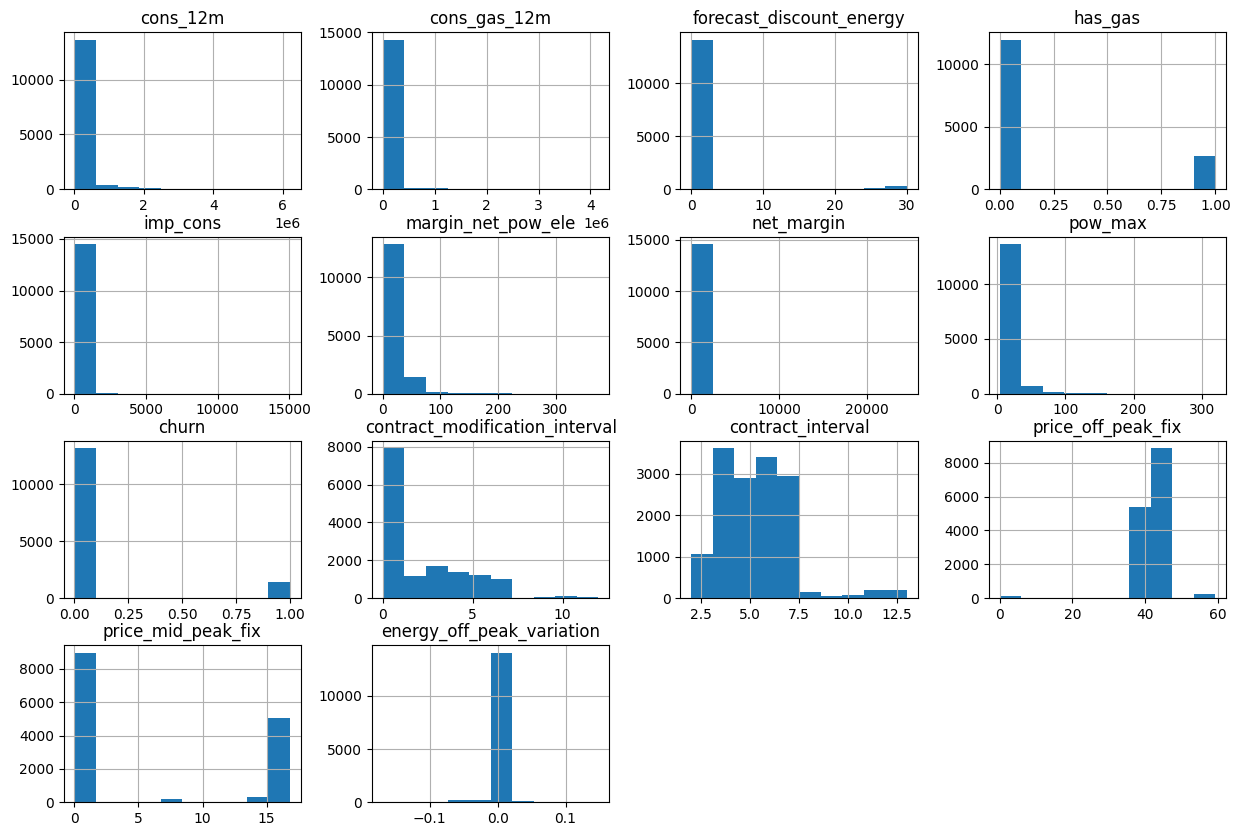

In [ ]:
#univariant Analysis
df.hist(figsize=(15,10))
plt.show()

***From the histograms, we can say that there is outliers and sknewness in the continous value features needed.***

In [ ]:
# To find the upper bound and lower bound of the distribution using inter-quantile range
def iqr_range(arr):
    q1 = np.quantile(arr,0.25)
    q3 = np.quantile(arr,0.75)
    iqr = q3-q1
    return q1-(iqr*1.5),q3+(iqr*1.5)

In [ ]:
def outlier_removal(df,column,drop_percentage=0.05):
    
    actual_rows = df.shape[0]
    lower_bound,upper_bound = iqr_range(df[column].values)
    outliers = df[ (df[column]<lower_bound) | (df[column]>upper_bound) ]
    print('Total No of rows in actual dataframe : ',actual_rows,'\nTotal No of rows in outliers : ',outliers.shape[0])
    if outliers.shape[0] <= round(actual_rows*drop_percentage):
        df.drop(outliers.index,inplace=True)
    
    return df

In [ ]:
#Removing outliers if the feature's outliers count is less than a certain threshold from the total dataset.
#Note: The threshold of the outlier removal was selected in the manner that the minority classes were preserved
for col in ['cons_12m', 'cons_gas_12m', 'imp_cons', 'margin_net_pow_ele', 'net_margin', 
       'pow_max',  'price_mid_peak_fix','energy_off_peak_variation','price_off_peak_fix']:
    df = outlier_removal(df,col,0.08)
    print(df.churn.value_counts())

Total No of rows in actual dataframe :  14593 
Total No of rows in outliers :  2084
0    13174
1     1419
Name: churn, dtype: int64
Total No of rows in actual dataframe :  14593 
Total No of rows in outliers :  2610
0    13174
1     1419
Name: churn, dtype: int64
Total No of rows in actual dataframe :  14593 
Total No of rows in outliers :  1214
0    13174
1     1419
Name: churn, dtype: int64
Total No of rows in actual dataframe :  14593 
Total No of rows in outliers :  660
0    12635
1     1298
Name: churn, dtype: int64
Total No of rows in actual dataframe :  13933 
Total No of rows in outliers :  979
0    11764
1     1190
Name: churn, dtype: int64
Total No of rows in actual dataframe :  12954 
Total No of rows in outliers :  1190
0    11764
1     1190
Name: churn, dtype: int64
Total No of rows in actual dataframe :  12954 
Total No of rows in outliers :  0
0    11764
1     1190
Name: churn, dtype: int64
Total No of rows in actual dataframe :  12954 
Total No of rows in outliers :  46

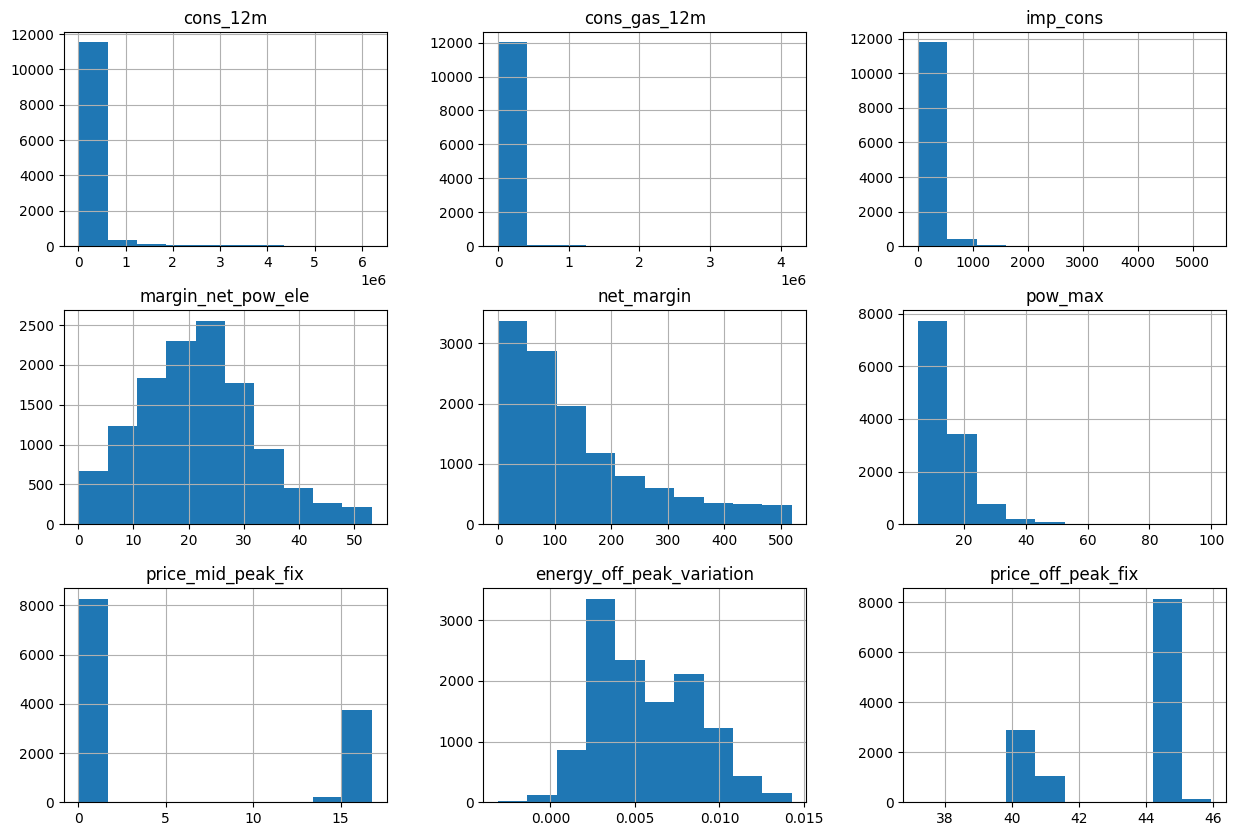

In [ ]:
#Feature Distribution after removing outliers
ax = df.hist(figsize=(15,10),column=['cons_12m', 'cons_gas_12m', 'imp_cons', 'margin_net_pow_ele', 'net_margin', 
       'pow_max',  'price_mid_peak_fix','energy_off_peak_variation','price_off_peak_fix'],bins=10)
plt.show()

## **Feature Analysis & Visualizations**

## **Client Churn**

In [ ]:
# Function to label partitions of pie chart
def annotation_labeling(lbl, vals):
    absolute = int(np.round(lbl/100.*np.sum(vals)))
    return "{:.1f}%\n({:d})".format(lbl, absolute)

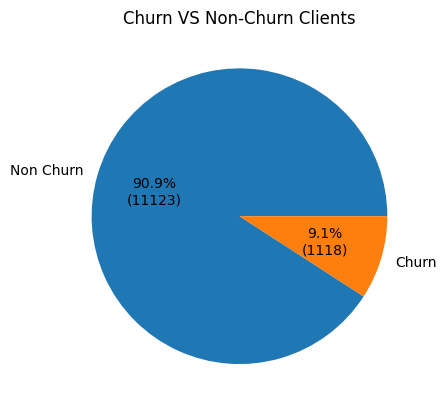

In [ ]:
plt.pie(df.churn.value_counts(),
        labels=['Non Churn','Churn'], 
        autopct=lambda x : annotation_labeling(x,df.churn.value_counts().values))
plt.title('Churn VS Non-Churn Clients')
plt.show()

In [ ]:
#Spliting the dataset into chrun and non-churn price by price date
churn_df = df[df['churn']==1]
non_churn_df = df[df['churn']==0]

## **Discount**

In [ ]:
df[df.forecast_discount_energy != 0].churn

88       0
106      0
229      0
230      1
271      0
293      0
359      0
470      0
664      1
915      0
955      0
1245     0
1365     0
1406     0
1467     0
1681     0
1954     0
2038     0
2471     0
2666     1
2836     0
2861     1
2901     0
2955     0
2968     0
3262     0
3407     0
3426     0
3427     1
3462     0
3525     0
3554     0
3589     0
3619     0
3639     0
3703     0
3809     0
3920     0
3921     0
4062     0
4084     0
4199     0
4403     0
4810     0
4829     0
4852     0
5097     0
5177     0
5398     0
5413     0
5434     0
5694     0
5703     0
5800     0
5832     0
6069     0
6347     1
6466     0
6495     0
6603     0
6815     0
7086     0
7120     0
7280     0
7610     0
7662     0
7753     0
7798     1
7930     0
8015     0
8020     0
8116     0
8135     0
8199     0
8293     0
8525     0
8613     1
8617     0
8695     0
8968     0
9040     0
9125     0
9195     0
9388     0
9400     0
9446     1
9658     0
9708     1
9755     0
9778     0
9829     0

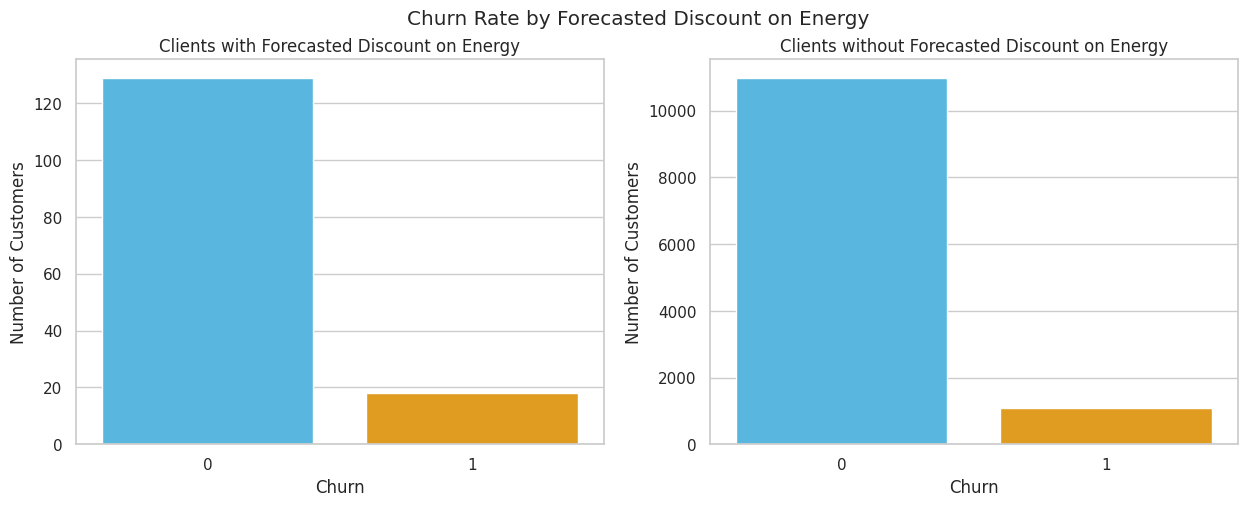

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataframe to create two subsets
with_discount = df[df.forecast_discount_energy != 0]
without_discount = df[df.forecast_discount_energy == 0]

# Plot the two subsets side by side using subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
sns.countplot(data=with_discount, x='churn', palette=['#42bff5', '#ffa500'], ax=ax1)
ax1.set_title('Clients with Forecasted Discount on Energy')
sns.countplot(data=without_discount, x='churn', palette=['#42bff5','#ffa500'], ax=ax2)
ax2.set_title('Clients without Forecasted Discount on Energy')

# Add labels and titles to the plot
plt.suptitle('Churn Rate by Forecasted Discount on Energy')
ax1.set_xlabel('Churn')
ax1.set_ylabel('Number of Customers')
ax2.set_xlabel('Churn')
ax2.set_ylabel('Number of Customers')
plt.show()


## **Contract Interval(Client's antiques)**


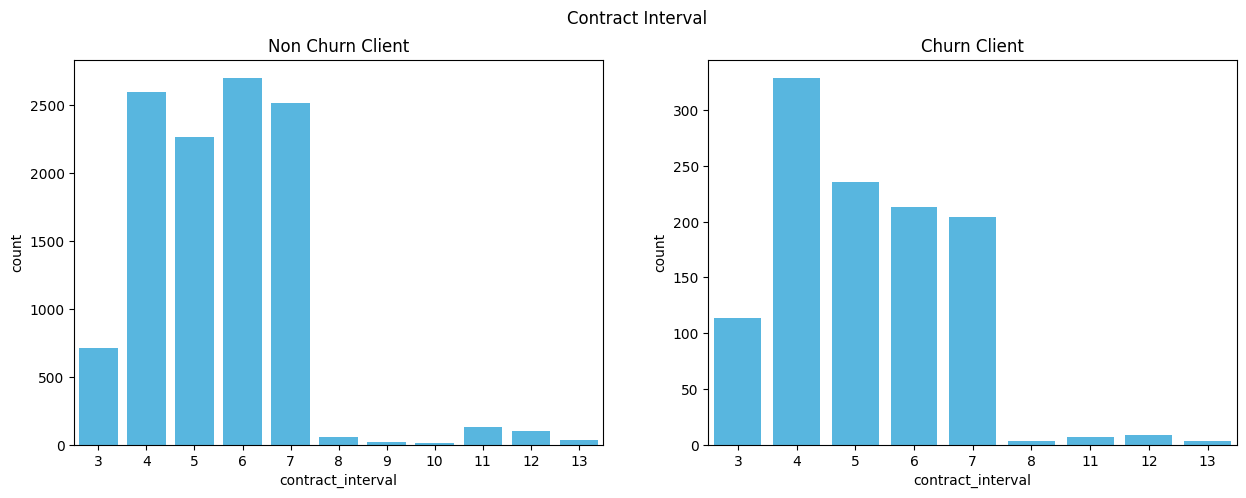

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
sns.countplot(x='contract_interval', data=non_churn_df, palette=['#42bff5'], ax=ax[0])
sns.countplot(x='contract_interval', data=churn_df, palette=['#42bff5'], ax=ax[1])
ax[0].set_title('Non Churn Client')
ax[1].set_title('Churn Client')
fig.suptitle('Contract Interval')
plt.show()


## **Contract Modification**

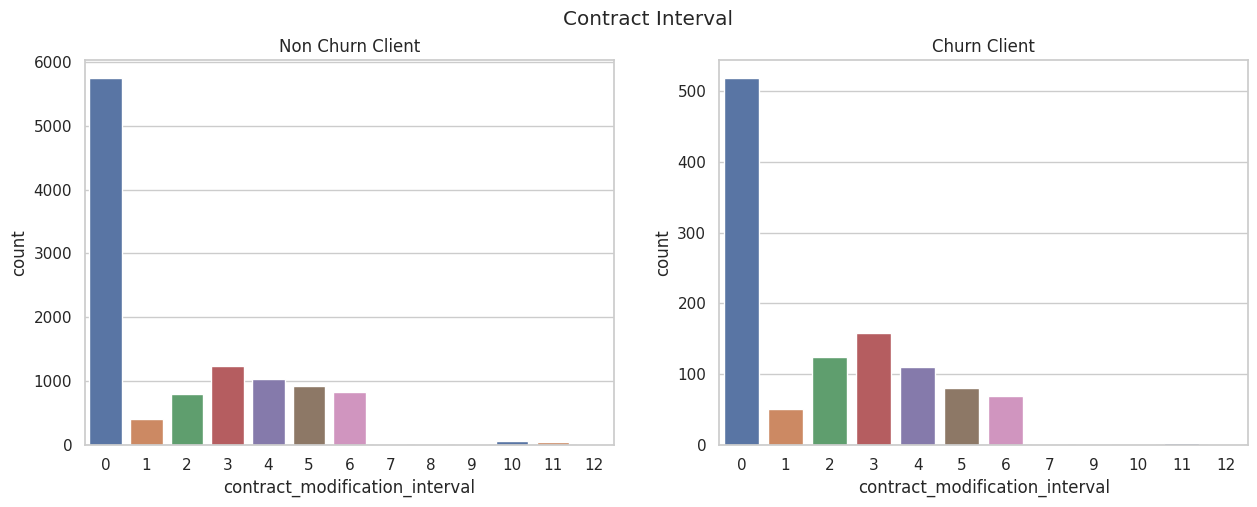

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
sns.countplot(x='contract_modification_interval', data=non_churn_df, palette='deep', ax=ax[0])
sns.countplot(x='contract_modification_interval', data=churn_df, palette='deep', ax=ax[1])
ax[0].set_title('Non Churn Client')
ax[1].set_title('Churn Client')
fig.suptitle('Contract Interval')
plt.show()


## **Origin Campaign**

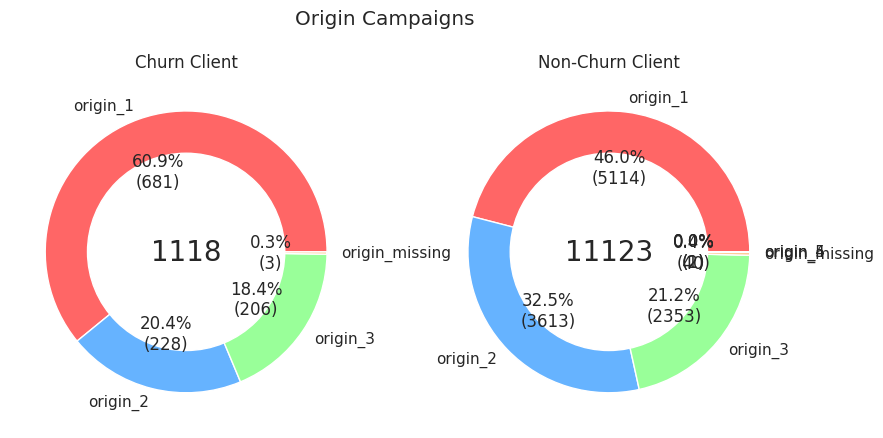

In [ ]:
colors = ['#ff6666', '#66b3ff', '#99ff99', '#ffcc99', '#ffb3e6']

plt.figure(figsize=(10,5))
plt.subplot(122)
plt.title('Non-Churn Client')
_,_,lbl_text = plt.pie(non_churn_df.origin_up.value_counts(),
        labels=non_churn_df.origin_up.value_counts().index,
        autopct=lambda x : annotation_labeling(x,non_churn_df.origin_up.value_counts()),colors=colors)

plt.gca().add_artist(plt.Circle((0,0), 0.7, fc='white'))
plt.text(0, 0, len(non_churn_df), ha='center', va='center', fontsize=20)

plt.subplot(121)
plt.title('Churn Client')
_,_,lbl_text = plt.pie(churn_df.origin_up.value_counts(),
        labels=churn_df.origin_up.value_counts().index,
        autopct=lambda x : annotation_labeling(x,churn_df.origin_up.value_counts()),colors=colors)

plt.gca().add_artist(plt.Circle((0,0), 0.7, fc='white'))
plt.text(0, 0, len(churn_df), ha='center', va='center', fontsize=20)

plt.suptitle("Origin Campaigns")
plt.show()


## **Sales Channel**

In [ ]:
clients_channel_count = df['channel_sales'].value_counts()
data = {
    'Channel Name' : clients_channel_count.index.values,
    'Channel Count' : clients_channel_count.values,
    'Percentage' : (clients_channel_count.values/client_data.shape[0])*100
}
channel_sales_data = pd.DataFrame(data)

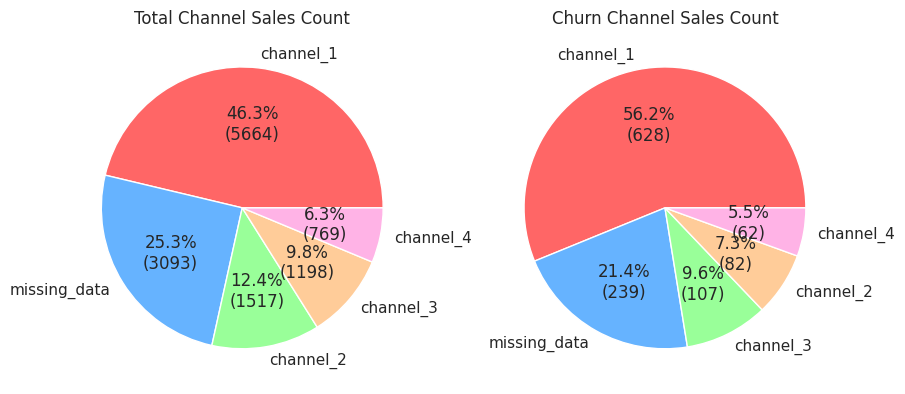

<Figure size 1000x500 with 0 Axes>

In [ ]:
churn_channel_sales =churn_df['channel_sales'].value_counts()
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 5))
plt.figure(figsize=(10,5))
#To avoid clumsiness in chart, last three rows are not taken into account for the plotting.
_,_,ax1_text = ax1.pie(x=channel_sales_data['Channel Count'][:-3],
                       labels=channel_sales_data['Channel Name'][:-3],
                       autopct = lambda x : annotation_labeling(x,channel_sales_data['Channel Count'].values),
                       colors=colors)
ax1.set_title('Total Channel Sales Count')
_,_,ax2_text=ax2.pie(x=churn_channel_sales.values,labels=churn_channel_sales.index,autopct = lambda x : annotation_labeling(x,churn_channel_sales.values),colors=colors)
ax2.set_title('Churn Channel Sales Count')

plt.show()

***Nearly 10% of the client left the company in 2015.There is a change in price scale between churn and non-churn clients.Most of the churned customers are from the same sales channel and origin, so a detailed analysis of that particular part can give more information on factors affecting customer churn rate.Recent customers are more likely to leave the company,The possible reasons can be low competitor's prices or poor customer care.***

### **Dimensionality Reduction**
***Before getting into the modeling part, visualizing the orientation of the data can give insights into selecting suitable model for training. Since there were many variables we can use dimensionality reduction to visualize the data. ***

In [ ]:
from sklearn.decomposition import PCA


In [ ]:
df =  pd.get_dummies(df,drop_first=True)
x,y = df.drop('churn',axis=1),df.churn

In [ ]:
pca = PCA(n_components=2)
pca_df = pd.DataFrame(pca.fit_transform(StandardScaler().fit_transform(x)),columns=['PCA1','PCA2'])
pca_df['churn'] = df['churn']
pca_df.head()

,PCA1,PCA2,churn
0,-1.642599,-0.842142,NaN
1,-1.517950,-0.405005,0.0
2,-1.461942,0.646485,0.0
3,1.497797,-1.296131,0.0
4,-0.501593,-0.687951,0.0


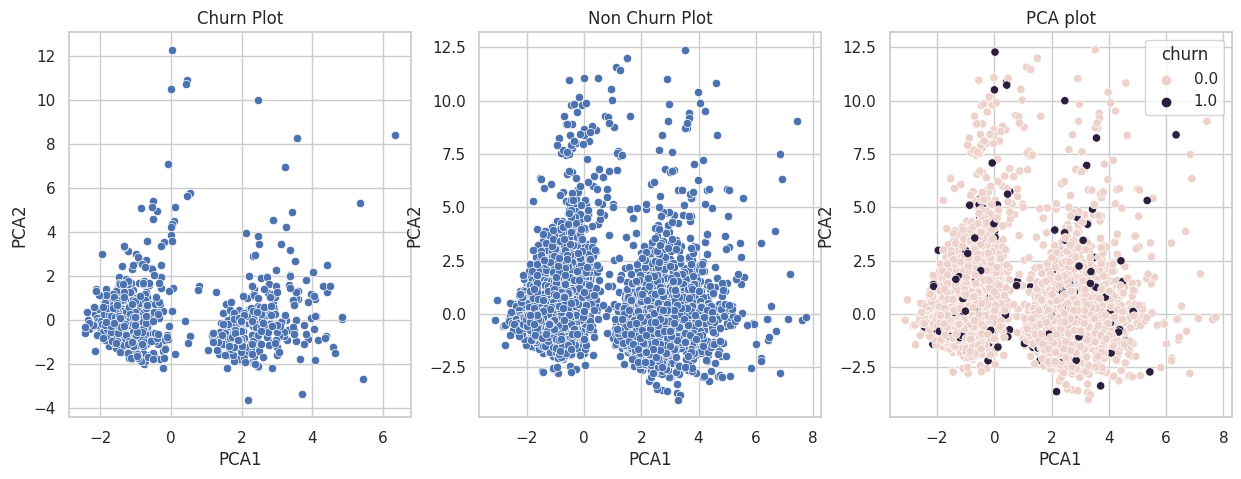

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.scatterplot(data=pca_df[pca_df['churn']==1],x='PCA1',y='PCA2')
plt.title('Churn Plot')
plt.subplot(132)
sns.scatterplot(data=pca_df[pca_df['churn']==0],x='PCA1',y='PCA2')
plt.title('Non Churn Plot')
plt.subplot(133)
sns.scatterplot(data=pca_df,x='PCA1',y='PCA2',hue='churn')
plt.title('PCA plot')
plt.show()

**There some extreme points that makes the plot skewed, Let's remove those points to view more clearly**

In [ ]:
lb1,ub1 = iqr_range(pca_df['PCA1'])
pca_df.drop(pca_df[(pca_df['PCA1']<lb1) | (pca_df['PCA1']>ub1)].index,inplace=True)

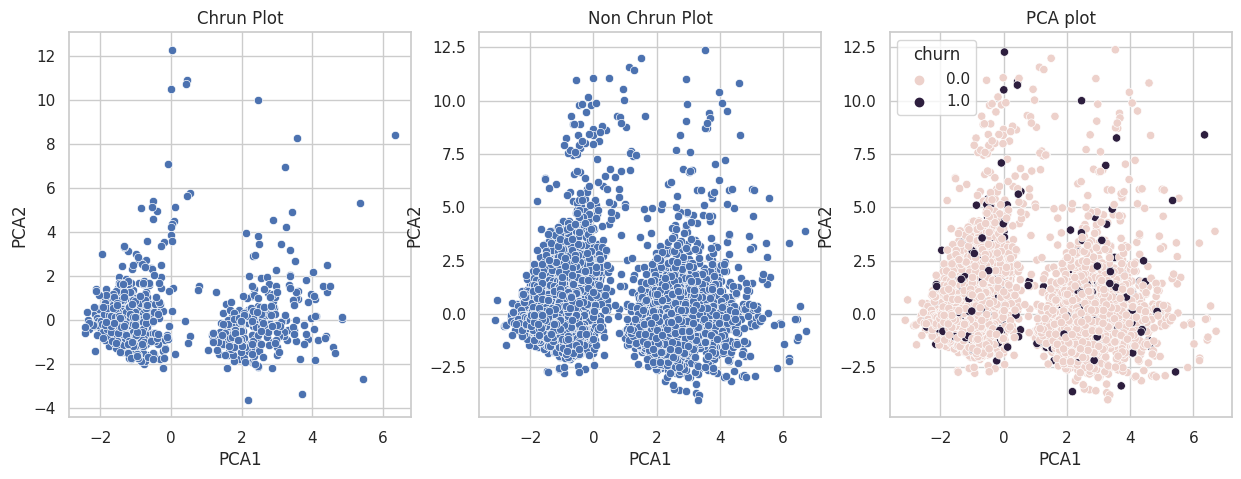

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.scatterplot(data=pca_df[pca_df['churn']==1],x='PCA1',y='PCA2')
plt.title('Chrun Plot')
plt.subplot(132)
sns.scatterplot(data=pca_df[pca_df['churn']==0],x='PCA1',y='PCA2')
plt.title('Non Chrun Plot')
plt.subplot(133)
sns.scatterplot(data=pca_df,x='PCA1',y='PCA2',hue='churn')
plt.title('PCA plot')
plt.show()

**By seeing the PCA plot, we can see that both churn and non-churn customers were not well separated.In the case of predictive modeling, KNN doesn't help much. We didn't see any clear separation boundary or cluster.But there may be a separation in a higher dimension that can be addressed by a hyperplane.If there is no effective hyperplane exists, we can try Tree and Ensemble Based Algorithms.**

**Before getting our hands on predictive modeling, we need to clear the imbalances in the dataset. Let's use the decision tree to choose the correct sample strategy.**

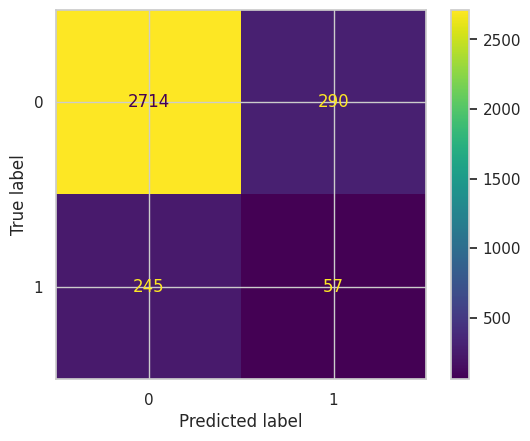

Model's f1 score for training dataset : 1.0 
Model's f1 score for test dataset : 0.17565485362095531
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      3004
           1       0.16      0.19      0.18       302

    accuracy                           0.84      3306
   macro avg       0.54      0.55      0.54      3306
weighted avg       0.85      0.84      0.84      3306



In [ ]:
#Decision Tree without treating the imbalanceness
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.27,stratify=y,random_state=42)
dt_model = tree.DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_train_pred = dt_model.predict(x_train)
y_pred = dt_model.predict(x_test)

cm_pred2 = confusion_matrix(y_test,y_pred,labels = dt_model.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm_pred2,display_labels=dt_model.classes_).plot()
plt.show()

print("Model's f1 score for training dataset :",f1_score(y_train,y_train_pred),
      "\nModel's f1 score for test dataset :",f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

## **Handling Imbalanceness of the data.**

**Determining Sampling Strategies for over-sampling the minority class**

In [ ]:
#Balancing the dataset by using simple oversample follow by undersampling
oversample = RandomOverSampler(sampling_strategy=0.5)
undersample = RandomUnderSampler(sampling_strategy='majority')
x_s,y_s = oversample.fit_resample(x,y)
x_s,y_s = undersample.fit_resample(x_s,y_s)
x_train,x_test,y_train,y_test = train_test_split(x_s,y_s,test_size=0.27,stratify=y_s,random_state=42)

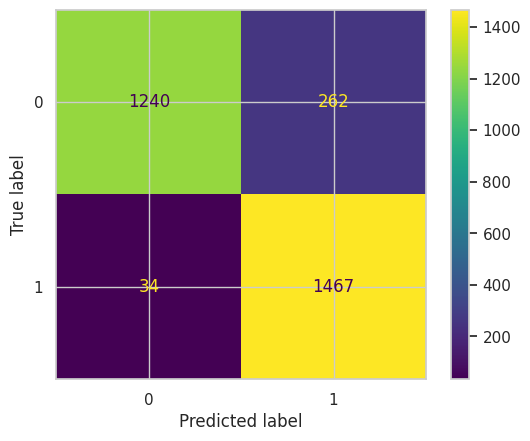

Model's f1 score for training dataset : 1.0 
Model's f1 score for test dataset : 0.908359133126935
              precision    recall  f1-score   support

           0       0.97      0.83      0.89      1502
           1       0.85      0.98      0.91      1501

    accuracy                           0.90      3003
   macro avg       0.91      0.90      0.90      3003
weighted avg       0.91      0.90      0.90      3003



In [ ]:
dt_model = tree.DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

y_train_pred = dt_model.predict(x_train)
y_pred = dt_model.predict(x_test)

cm_pred2 = confusion_matrix(y_test,y_pred,labels = dt_model.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm_pred2,display_labels=dt_model.classes_).plot()
plt.show()

print("Model's f1 score for training dataset :",f1_score(y_train,y_train_pred),
      "\nModel's f1 score for test dataset :",f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [ ]:
#Feature importance as per the model with combined oversampling and undersampling
pd.Series(dt_model.feature_importances_,x_s.columns).sort_values(ascending=False)

cons_12m                          0.175650
margin_net_pow_ele                0.152924
net_margin                        0.127036
energy_off_peak_variation         0.107257
pow_max                           0.089186
imp_cons                          0.088146
price_off_peak_fix                0.055301
contract_interval                 0.043045
contract_modification_interval    0.039327
cons_gas_12m                      0.022378
origin_up_origin_2                0.021016
price_mid_peak_fix                0.016881
channel_sales_channel_3           0.012162
origin_up_origin_3                0.011733
channel_sales_channel_4           0.011559
channel_sales_channel_2           0.010111
has_gas                           0.009029
channel_sales_missing_data        0.005332
forecast_discount_energy          0.001503
origin_up_origin_missing          0.000424
channel_sales_channel_5           0.000000
channel_sales_channel_6           0.000000
channel_sales_channel_7           0.000000
origin_up_o

In [ ]:
# Balancing dataset using Synthetic Minority Over-sampling Technique with Edited Nearest Neighbour
smt = SMOTEENN(random_state=42,sampling_strategy=0.7)
x_s,y_s = smt.fit_resample(x,y)
x_train,x_test,y_train,y_test = train_test_split(x_s,y_s,test_size=0.27,stratify=y_s,random_state=42)

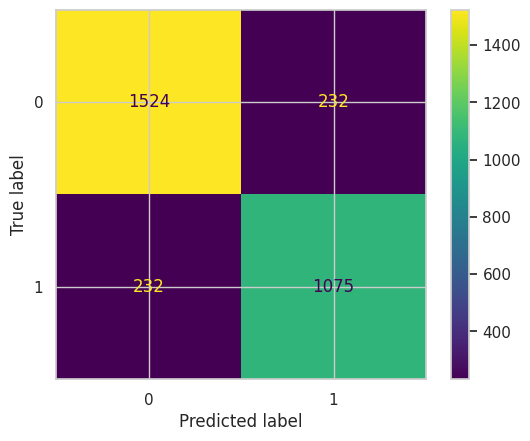

Model's f1 score for training dataset : 1.0 
Model's f1 score for test dataset : 0.8224942616679418
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1756
           1       0.82      0.82      0.82      1307

    accuracy                           0.85      3063
   macro avg       0.85      0.85      0.85      3063
weighted avg       0.85      0.85      0.85      3063



In [ ]:
dt_model = tree.DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_train_pred = dt_model.predict(x_train)
y_pred = dt_model.predict(x_test)

cm_pred2 = confusion_matrix(y_test,y_pred,labels = dt_model.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm_pred2,display_labels=dt_model.classes_).plot()
plt.show()

print("Model's f1 score for training dataset :",f1_score(y_train,y_train_pred),
      "\nModel's f1 score for test dataset :",f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [ ]:
#Feature importance as per the model with SMOTEENN
pd.Series(dt_model.feature_importances_,x_s.columns).sort_values(ascending=False)

price_mid_peak_fix                0.147562
cons_12m                          0.139813
pow_max                           0.118460
margin_net_pow_ele                0.093993
origin_up_origin_2                0.084101
origin_up_origin_3                0.076612
price_off_peak_fix                0.075375
net_margin                        0.064463
energy_off_peak_variation         0.052742
imp_cons                          0.050256
contract_interval                 0.025751
cons_gas_12m                      0.019070
contract_modification_interval    0.017093
channel_sales_channel_3           0.013073
has_gas                           0.006375
channel_sales_channel_2           0.005980
channel_sales_missing_data        0.004837
forecast_discount_energy          0.001689
channel_sales_channel_4           0.001673
origin_up_origin_missing          0.001080
channel_sales_channel_5           0.000000
channel_sales_channel_6           0.000000
channel_sales_channel_7           0.000000
origin_up_o

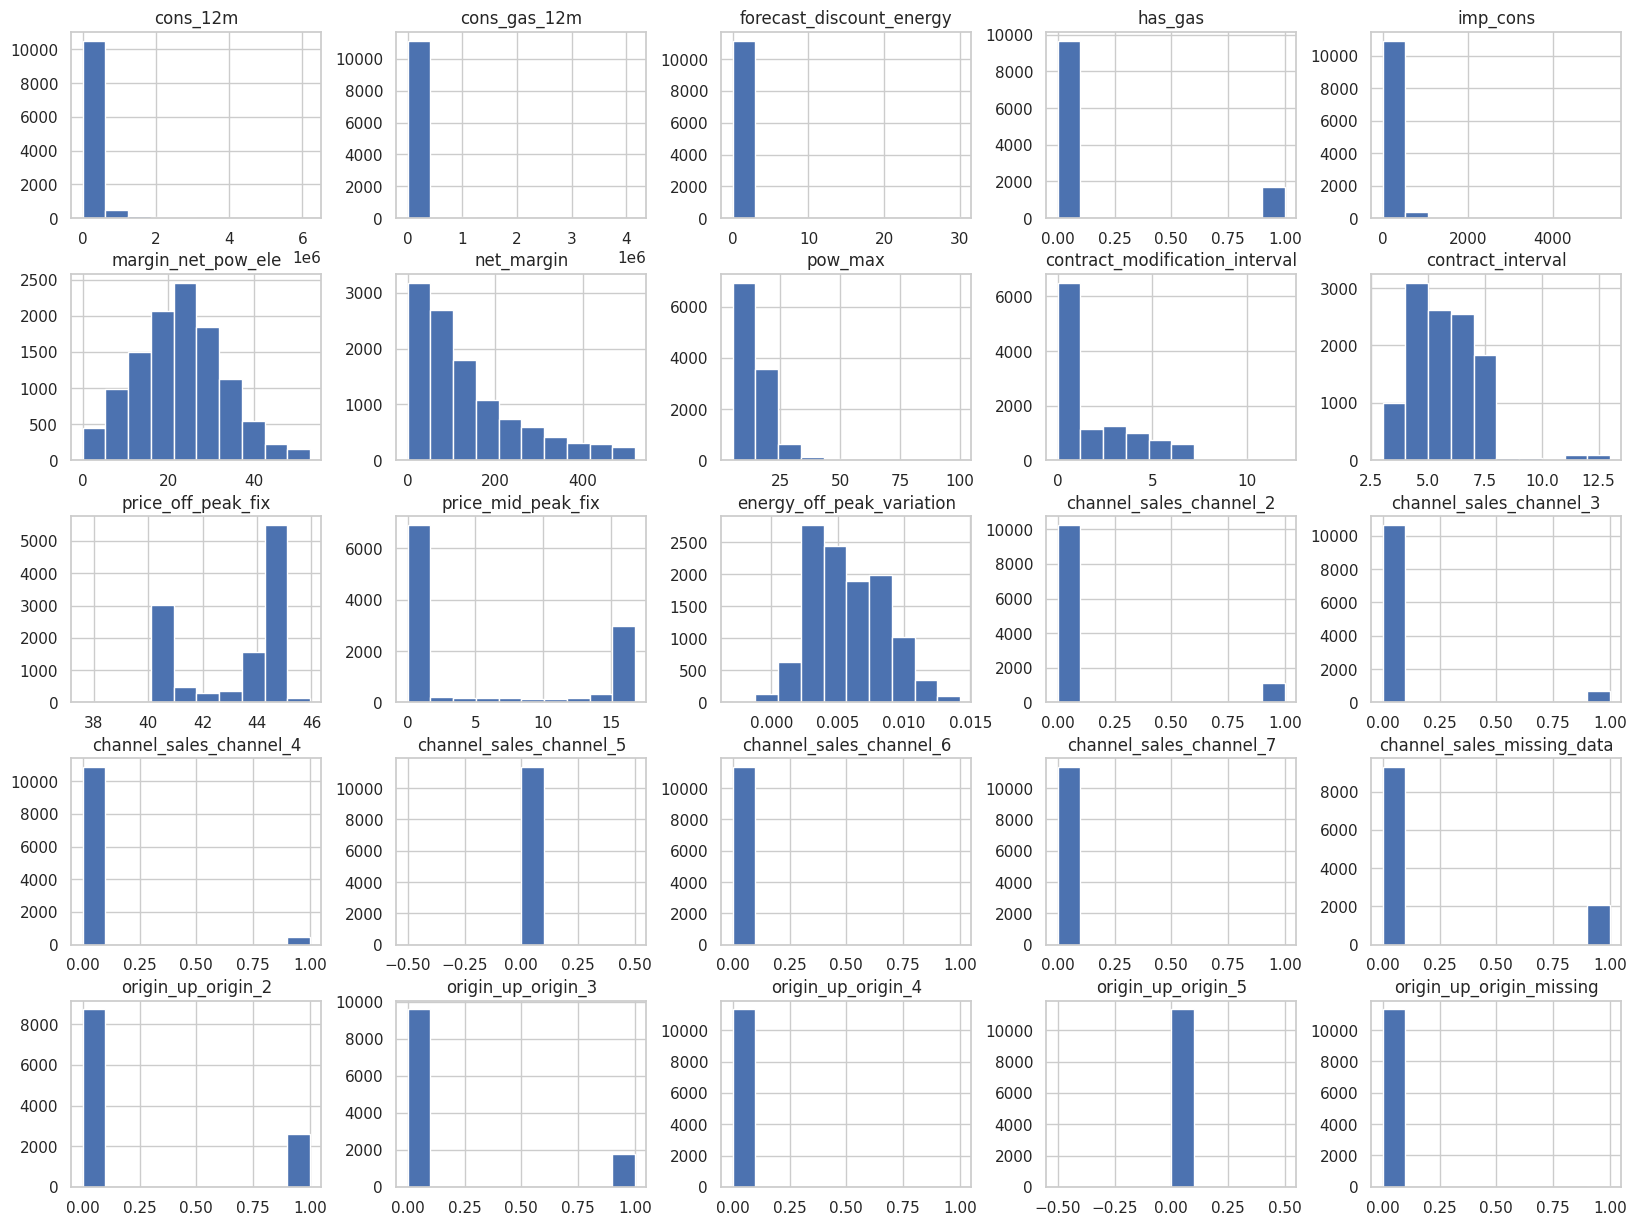

In [ ]:
x_s.hist(figsize=(20,15))
plt.show()

***The synthesized samples by SMOTEENN had a significant impact on feature importance.A discussion with domain expert is needed to verify such values and distributions in the features is possible or not.For this analysis, we use combined undersampling and oversampling as our sampling technique.***

### **Combined Over-Sampling and Under-Sampling**


In [ ]:
oversample = RandomOverSampler(sampling_strategy=0.5)
undersample = RandomUnderSampler(sampling_strategy='majority')
x_s,y_s = oversample.fit_resample(x,y)
x_s,y_s = undersample.fit_resample(x_s,y_s)
x_train,x_test,y_train,y_test = train_test_split(x_s,y_s,test_size=0.27,stratify=y_s,random_state=42)

### **Model Creation**

### **Logistic Regression.**

**In the EDA part itself, we have seen that the data were highly skewed, so before applying logistic regression necessary feature transformation is needed for better performance.**

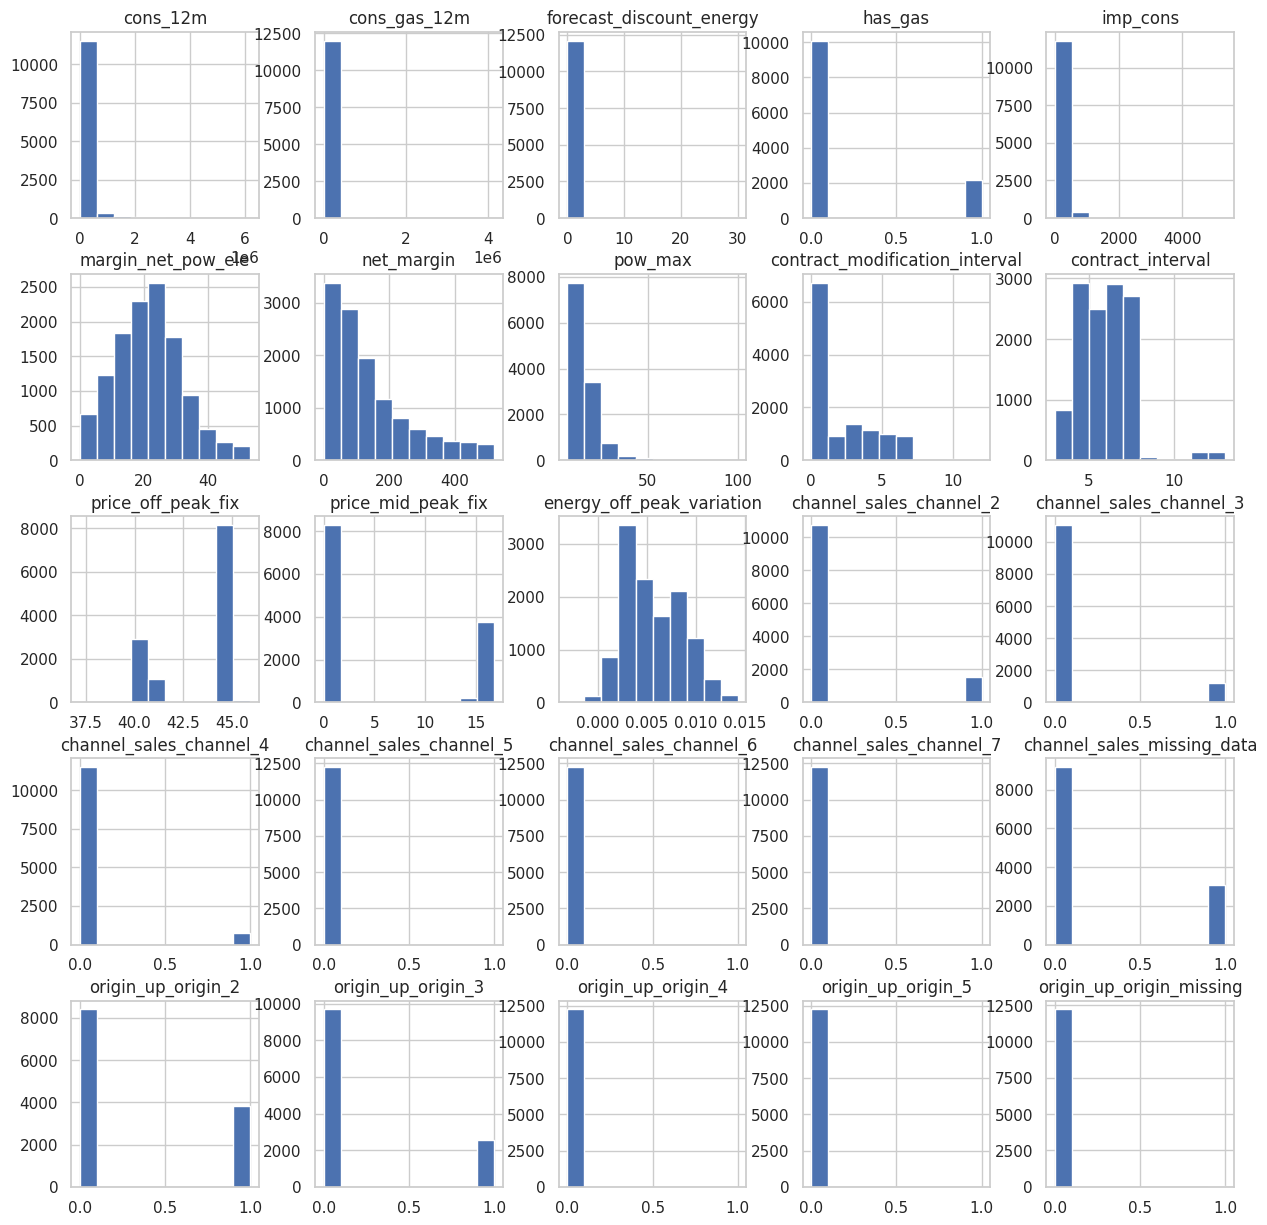

In [ ]:
#Distribution of features before transformation
x.hist(figsize=(15,15),bins=10)
plt.show()

**QuantileTransformer**:- 

***This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values.The transformation is applied on each feature independently.First an estimate of the cumulative distribution function of a feature is used to map the original values to a uniform distribution. The obtained values are then mapped to the desired output distribution using the associated quantile function.***

In [ ]:
x_scaled = pd.DataFrame(MinMaxScaler().fit_transform(x),columns=x.columns)
q_trans = QuantileTransformer(output_distribution="normal")
x_scaled['cons_12m'] = q_trans.fit_transform(x_scaled['cons_12m'].values.reshape(-1, 1))
x_scaled['net_margin'] = q_trans.fit_transform(x_scaled['net_margin'].values.reshape(-1, 1))
x_scaled['pow_max'] = q_trans.fit_transform(x_scaled['pow_max'].values.reshape(-1, 1))
x_scaled['contract_modification_interval'] = q_trans.fit_transform(x_scaled['contract_modification_interval'].values.reshape(-1, 1))
x_scaled['contract_interval'] = q_trans.fit_transform(x_scaled['contract_interval'].values.reshape(-1, 1))
x_scaled['price_off_peak_fix'] = q_trans.fit_transform(x_scaled['price_off_peak_fix'].values.reshape(-1, 1))
x_scaled['price_mid_peak_fix'] = q_trans.fit_transform(x_scaled['price_mid_peak_fix'].values.reshape(-1, 1))
x_scaled['energy_off_peak_variation'] = q_trans.fit_transform(x_scaled['energy_off_peak_variation'].values.reshape(-1, 1))
x_scaled['cons_gas_12m'] = q_trans.fit_transform(x_scaled['cons_gas_12m'].values.reshape(-1, 1))
x_scaled['imp_cons'] = q_trans.fit_transform(x_scaled['cons_gas_12m'].values.reshape(-1, 1))

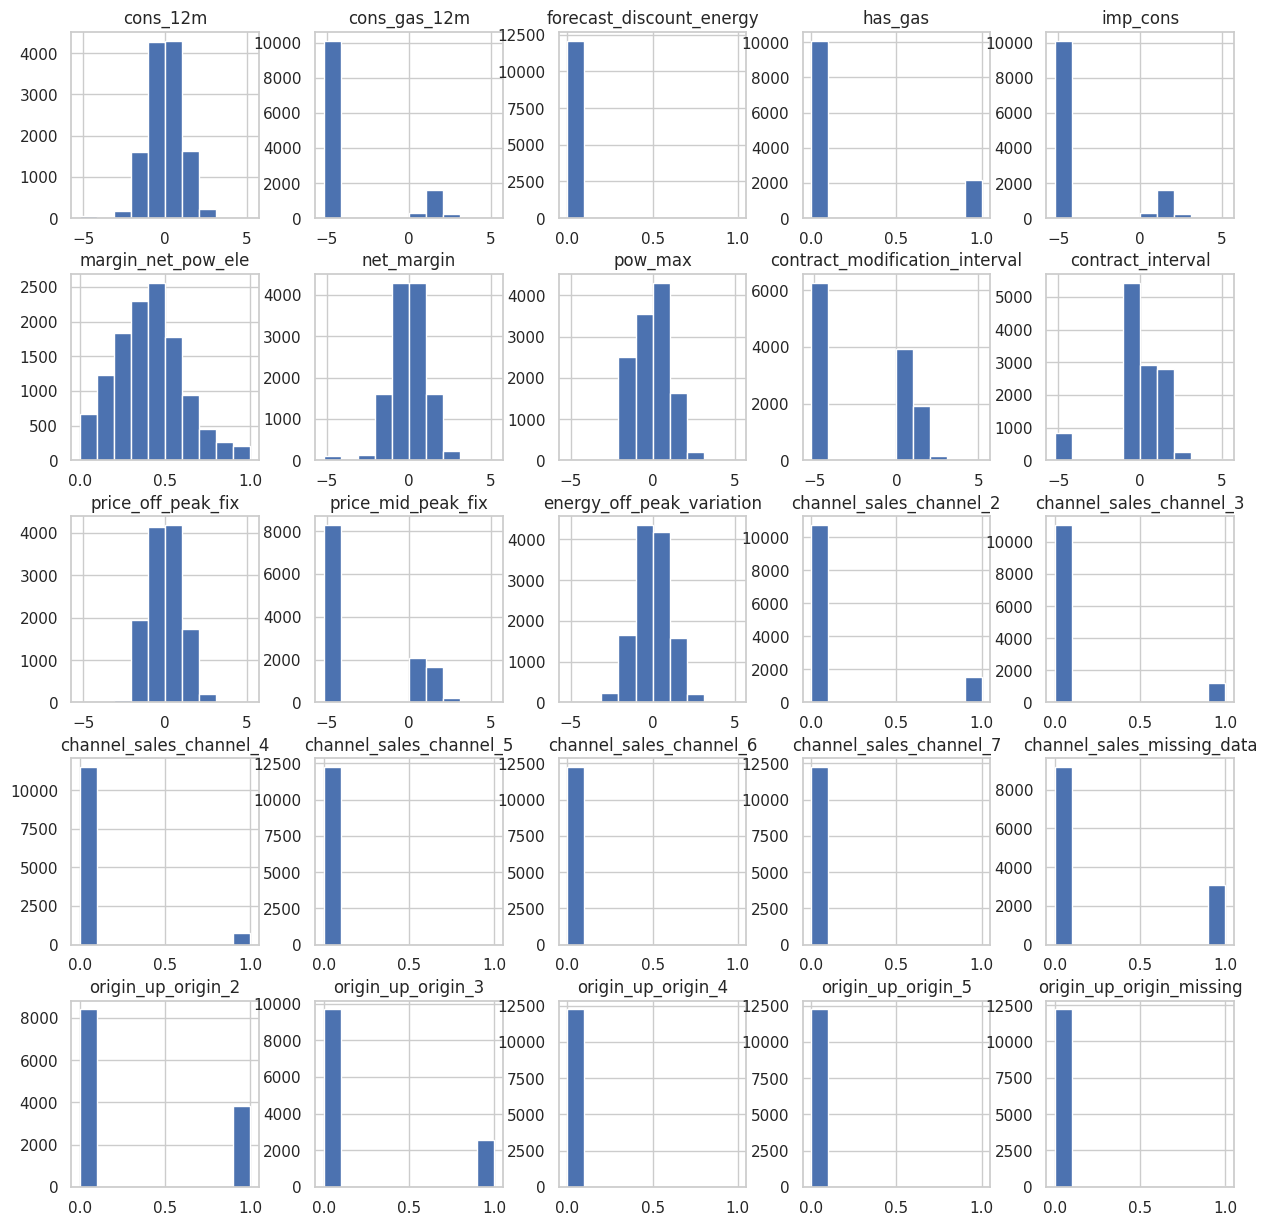

In [ ]:
#Distribution of features after transformation
x_scaled.hist(figsize=(15,15),bins=10)
plt.show()

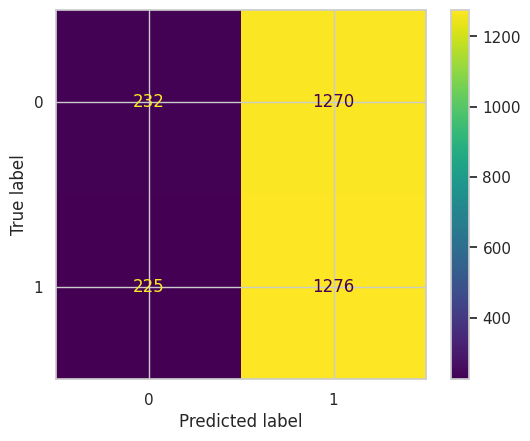

Model's f1 score for training dataset : 0.63766791556246 
Model's f1 score for test dataset : 0.6305905609093156
              precision    recall  f1-score   support

           0       0.51      0.15      0.24      1502
           1       0.50      0.85      0.63      1501

    accuracy                           0.50      3003
   macro avg       0.50      0.50      0.43      3003
weighted avg       0.50      0.50      0.43      3003



In [ ]:
log_reg = LogisticRegression(random_state=0)
log_reg.fit(x_train,y_train)
yt_pred = log_reg.predict(x_train)
y_pred = log_reg.predict(x_test)
cm_pred2 = confusion_matrix(y_test,y_pred,labels = dt_model.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm_pred2,display_labels=dt_model.classes_).plot()
plt.show()

print("Model's f1 score for training dataset :",f1_score(y_train,yt_pred),
      "\nModel's f1 score for test dataset :",f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

## **Support Vector Classification**

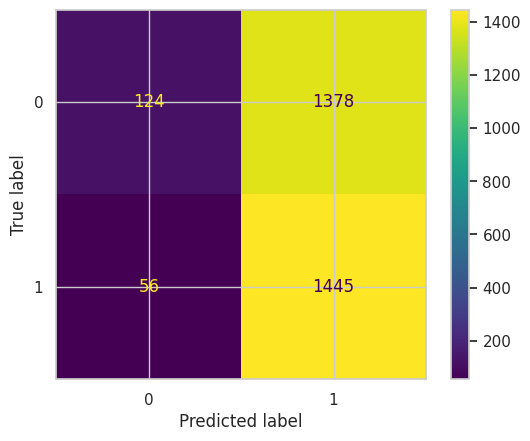

Model's f1 score for training dataset : 0.669919534326314 
Model's f1 score for test dataset : 0.6683626271970398
              precision    recall  f1-score   support

           0       0.69      0.08      0.15      1502
           1       0.51      0.96      0.67      1501

    accuracy                           0.52      3003
   macro avg       0.60      0.52      0.41      3003
weighted avg       0.60      0.52      0.41      3003



In [ ]:
svc_model = SVC(random_state=0)
svc_model.fit(x_train,y_train)
yt_pred = svc_model.predict(x_train)
y_pred = svc_model.predict(x_test)
cm_pred2 = confusion_matrix(y_test,y_pred,labels = svc_model.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm_pred2,display_labels=svc_model.classes_).plot()
plt.show()

print("Model's f1 score for training dataset :",f1_score(y_train,yt_pred),
      "\nModel's f1 score for test dataset :",f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

***From the results of Logistic Regression and Support Vector Classifier, we can conclude that there is no hyperplane that effectively separate the churn and unchurned customers.*** ***Let's try with Decision Tree and Random Forest***

## **Decision Tree**

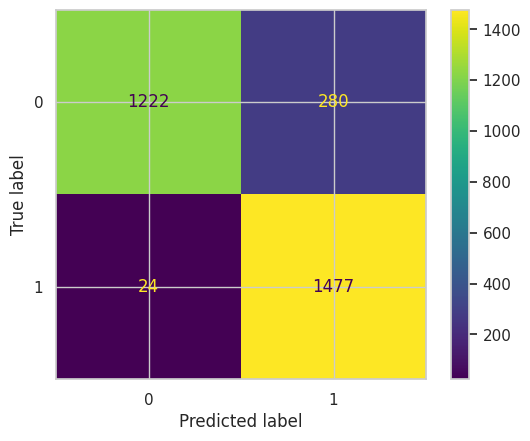

Model's f1 score for training dataset : 1.0 
Model's f1 score for test dataset : 0.9066912216083486
              precision    recall  f1-score   support

           0       0.98      0.81      0.89      1502
           1       0.84      0.98      0.91      1501

    accuracy                           0.90      3003
   macro avg       0.91      0.90      0.90      3003
weighted avg       0.91      0.90      0.90      3003



In [ ]:
dt_model = tree.DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_train_pred = dt_model.predict(x_train)
y_pred = dt_model.predict(x_test)

cm_pred2 = confusion_matrix(y_test,y_pred,labels = dt_model.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm_pred2,display_labels=dt_model.classes_).plot()
plt.show()

print("Model's f1 score for training dataset :",f1_score(y_train,y_train_pred),
      "\nModel's f1 score for test dataset :",f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

## **Random Forest**

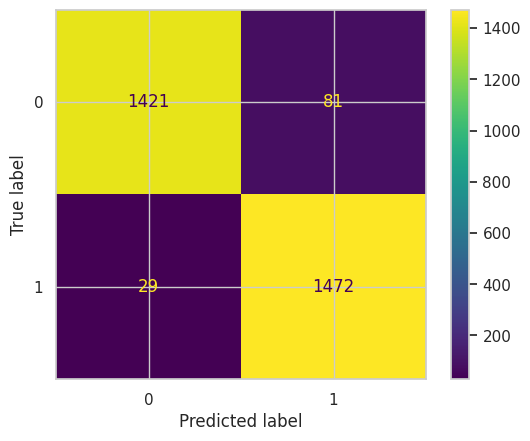

Model's f1 score for training dataset : 1.0 
Model's f1 score for test dataset : 0.9639816633922724
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1502
           1       0.95      0.98      0.96      1501

    accuracy                           0.96      3003
   macro avg       0.96      0.96      0.96      3003
weighted avg       0.96      0.96      0.96      3003



In [ ]:
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(x_train,y_train)
yt_pred = rf_model.predict(x_train)
y_pred = rf_model.predict(x_test)
cm_pred2 = confusion_matrix(y_test,y_pred,labels = rf_model.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm_pred2,display_labels=rf_model.classes_).plot()
plt.show()

print("Model's f1 score for training dataset :",f1_score(y_train,yt_pred),
      "\nModel's f1 score for test dataset :",f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

***From the above classifiers, we can say that the random forest model did the best job of separating churn and non-churn customers. The selection of sampling technique plays a major role here, because the price variation has variable impact based on sampling strategy.*** ***But as per the model energy consumption, profit margin, subscribed power, etc has significant importance in the classification task. So we need to investigate the price technique, competitor's subscription plans and discount to arrive precise conclusion.***